In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Laptop Dataset.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [5]:
# check null value
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [6]:
# remove null
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [8]:
for i in df:
  print(df[i].value_counts())

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64
ScreenResolution
Full HD 1920x1080                                495
1366x768                                         

In [9]:
# replace ? with null
df.replace('?',np.nan,inplace=True)

In [10]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,1
ScreenResolution,0
Cpu,0
Ram,0
Memory,1
Gpu,0
OpSys,0
Weight,1


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [13]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [14]:
# change datatype
df['Inches']=df['Inches'].astype(float)
df['Ram']=df['Ram'].astype(float)
df['Weight']=df['Weight'].astype(float)

In [15]:
# check outlier
df.describe()

,Inches,Ram,Weight,Price
count,1270.000000,1270.00000,1270.000000,1270.000000
mean,15.131890,8.45748,2.077677,59886.072669
std,1.955256,5.56693,0.808377,37323.784300
min,10.100000,1.00000,0.000200,9270.720000
25%,14.000000,4.00000,1.500000,31914.720000
50%,15.600000,8.00000,2.040000,52054.560000
75%,15.600000,8.00000,2.320000,79303.816800
max,35.600000,64.00000,11.100000,324954.720000


<Axes: >

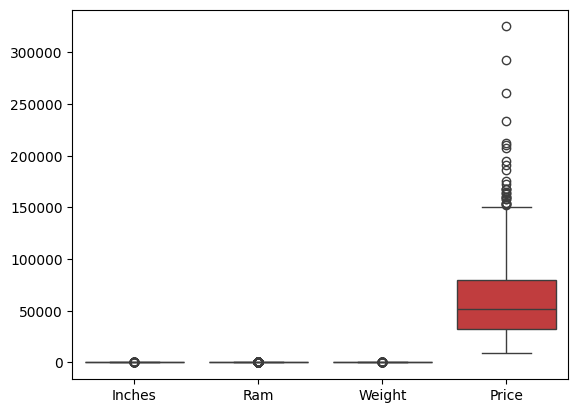

In [16]:
sns.boxplot(df)

In [17]:
# IQR
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr

print('lower_fence >= ',lower_fence,' ','upper_fence <= ',upper_fence)

df=df[(df['Price']>=lower_fence) & (df['Price']<=upper_fence)]
df.shape

lower_fence >=  -39168.9252   upper_fence <=  150387.462


(1242, 11)

<Axes: >

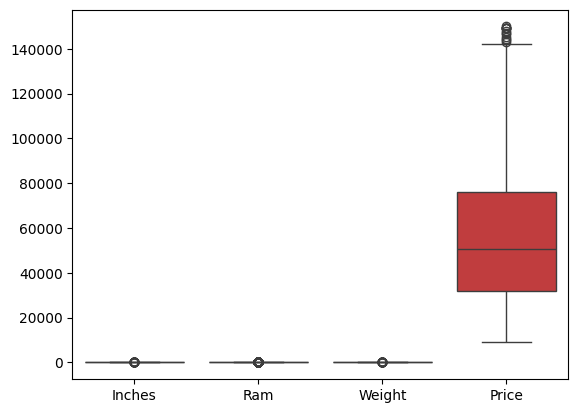

In [18]:
sns.boxplot(df)

In [19]:
# convert text to num using labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Company']=le.fit_transform(df['Company'])
df['TypeName']=le.fit_transform(df['TypeName'])
df['ScreenResolution']=le.fit_transform(df['ScreenResolution'])
df['Cpu']=le.fit_transform(df['Cpu'])
df['Memory']=le.fit_transform(df['Memory'])
df['Gpu']=le.fit_transform(df['Gpu'])
df['OpSys']=le.fit_transform(df['OpSys'])
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8.0,4,56,8,1.37,71378.6832
1,1,4,13.3,1,63,8.0,2,49,8,1.34,47895.5232
2,7,3,15.6,8,74,8.0,14,51,4,1.86,30636.0000
3,1,4,15.4,25,85,16.0,27,8,8,1.83,135195.3360
4,1,4,13.3,23,67,8.0,14,57,8,1.37,96095.8080


In [20]:
x=df.drop('Price',axis=1)
y=df['Price']

In [21]:
# min_max_scaler
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_scaled=mm.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,0.055556,0.8,0.125490,0.589744,0.570175,0.111111,0.114286,0.554455,1.0,0.123408
1,0.055556,0.8,0.125490,0.025641,0.552632,0.111111,0.057143,0.485149,1.0,0.120705
2,0.388889,0.6,0.215686,0.205128,0.649123,0.111111,0.400000,0.504950,0.5,0.167553
3,0.055556,0.8,0.207843,0.641026,0.745614,0.238095,0.771429,0.079208,1.0,0.164850
4,0.055556,0.8,0.125490,0.589744,0.587719,0.111111,0.400000,0.564356,1.0,0.123408


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape

((993, 10), (249, 10))

In [24]:
#linear regression ,randomforest ,svm ,xgboost, adaboost ,decisiontree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
rf=RandomForestRegressor()
svm=SVR()
xgb=XGBRegressor()
ada=AdaBoostRegressor()
dt=DecisionTreeRegressor()
models=[lr,rf,svm,xgb,ada,dt]
model_names=['LinearRegression','RandomForestRegressor','SVR','XGBRegressor','AdaBoostRegressor','DecisionTreeRegressor']
for i in range(len(models)):
  models[i].fit(x_train,y_train)
  y_pred=models[i].predict(x_test)
  print(model_names[i])
  print('r2_score: ',r2_score(y_test,y_pred))
  print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
  print('mean_squared_error: ',mean_squared_error(y_test,y_pred))



LinearRegression
r2_score:  0.6774787934400388
mean_absolute_error:  14452.953410304111
mean_squared_error:  350676425.7003645
RandomForestRegressor
r2_score:  0.8361532780086072
mean_absolute_error:  9147.642986584511
mean_squared_error:  178150092.65129003
SVR
r2_score:  -0.011708540207062246
mean_absolute_error:  25741.77764099109
mean_squared_error:  1100027928.44069
XGBRegressor
r2_score:  0.8528556218903052
mean_absolute_error:  8586.242939501757
mean_squared_error:  159989679.83464235
AdaBoostRegressor
r2_score:  0.6721691395513063
mean_absolute_error:  15500.416113173073
mean_squared_error:  356449597.8500865
DecisionTreeRegressor
r2_score:  0.7983285192654674
mean_absolute_error:  9973.36123373494
mean_squared_error:  219276849.37064028


In [28]:
# gridSearch
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
grid=GridSearchCV(estimator=xgb,param_grid=param,cv=5)
grid.fit(x_train,y_train)
best_params=grid.best_params_
best_score=grid.best_score_
best_estimator=grid.best_estimator_
print('best_params: ',best_params)
print('best_score: ',best_score)
print('best_estimator: ',best_estimator)
best_estimator.fit(x_train,y_train)
y_pred=best_estimator.predict(x_test)
print('r2_score: ',r2_score(y_test,y_pred))




best_params:  {'n_estimators': 100}
best_score:  0.8304531128255135
best_estimator:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
r2_score:  0.8528556218903052
